**Grupo 1:**
<br>Juana Mejía 
<br>Daniela Espinosa
<br>Pablo Ortega

## Inteligencia de negocios
### Laboratorio 2 - Agrupación

In [835]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.cluster import AgglomerativeClustering # type: ignore
from sklearn.metrics import silhouette_score, davies_bouldin_score # type: ignore
from scipy.cluster.hierarchy import dendrogram, linkage # type: ignore
from sklearn.decomposition import PCA # type: ignore
import plotly.express as px # type: ignore
import seaborn as sns # type: ignore

Carga de datos

In [836]:
df = pd.read_csv('202420_Laboratorio 2 - Agrupación_202420_Laboratorio_2_-_Agrupación_data.csv')

In [837]:
df.shape

(1000, 23)

#### Descripción General de los Datos
Este conjunto de datos médicos contiene información sobre 1000 pacientes con 23 características tanto clínicas como demográficas, con el fin de estimar el tiempo aproximado de hospitalización de un paciente. A continuación, se describen las características de las variables, el perfil de los datos y el análisis de calidad de datos.

In [838]:
pd.set_option('display.max_columns', None)
df.head()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Queja_Principal,Estado_Mental,Dolor,dolor_NRS,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Diagnostico_En_Urgencias,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Duracion_KTAS_Min,Error_Triaje
0,2,2,49,2,1,ant. chest pain,1,1,2,150.0,90.0,92.0,20.0,36.2,98.0,2,Ischaemic chest pain,2,2,0,1591,"2,00",0
1,2,2,30,4,1,headache,1,1,4,140.0,80.0,76.0,20.0,36.3,99.0,3,"Subarachnoid haemorrhage, unspecified",7,3,0,211,"3,00",0
2,2,1,61,3,2,ant. chest pain,1,1,3,100.0,60.0,84.0,20.0,36.4,98.0,4,Contusion of front wall of thorax,1,4,0,119,"2,00",0
3,2,2,61,3,1,headache,1,1,4,120.0,70.0,76.0,20.0,36.5,99.0,4,Headache,1,3,4,414,"2,00",2
4,1,2,67,3,1,fever & chill,1,0,#BOÞ!,143.0,70.0,130.0,20.0,38.1,NaN,4,Fever,1,2,1,267,"3,60",2


#### Estadísticas descriptivas

In [839]:
pd.set_option('display.max_columns', None)
df.describe()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Estado_Mental,Dolor,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Error_Triaje
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,983.000000,979.000000,988.000000,985.000000,989.000000,444.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.450000,1.514000,53.892000,2.811000,1.2000,1.103000,0.562000,133.485249,79.566905,84.400810,19.450761,36.562993,97.047297,3.328000,1.610000,3.260000,0.569000,12792.480000,0.253000
std,0.497743,0.500054,19.826483,0.796186,0.4002,0.431946,0.496389,27.156136,15.174593,16.297428,2.069882,0.519699,4.761112,0.862067,1.161572,0.865534,1.587375,87721.151446,0.630387
min,1.000000,1.000000,16.000000,1.000000,1.0000,1.000000,0.000000,50.000000,31.000000,32.000000,14.000000,35.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,36.000000,2.000000,1.0000,1.000000,0.000000,114.000000,70.000000,73.000000,18.000000,36.200000,97.000000,3.000000,1.000000,3.000000,0.000000,132.750000,0.000000
50%,1.000000,2.000000,56.000000,3.000000,1.0000,1.000000,1.000000,130.000000,80.000000,82.000000,20.000000,36.500000,98.000000,3.000000,1.000000,3.000000,0.000000,270.500000,0.000000
75%,2.000000,2.000000,70.250000,3.000000,1.0000,1.000000,1.000000,150.000000,90.000000,96.000000,20.000000,36.800000,99.000000,4.000000,2.000000,4.000000,0.000000,620.000000,0.000000
max,2.000000,2.000000,94.000000,7.000000,2.0000,4.000000,1.000000,275.000000,160.000000,148.000000,30.000000,39.800000,100.000000,5.000000,7.000000,5.000000,9.000000,709510.000000,2.000000


Las estadísticas descriptivas nos permiten observar varias cosas:

1. **Count** -> Existen valores faltantes en las columnas SBP, DBP, HR, RR, BT, Saturación.
2. **Mean y std** -> Nos permiten tener una primera imagen mental de cómo se distribuyen los datos.
3. **Mean, std, min, max** -> Es evidente que la variable objetivo está extremadamente dispersa y muy posiblemente tiene casos atípicos.

Es importante recalcar que en la tabla se presentan varias estadísticas de las variables categóricas codificadas; sin embargo, muchas de estas, como el promedio y la desviación estándar, no tienen sentido y, por lo tanto, no sirven para sacar conclusiones.

A continuación se observan histogramas de las distribuciones de cada característica.

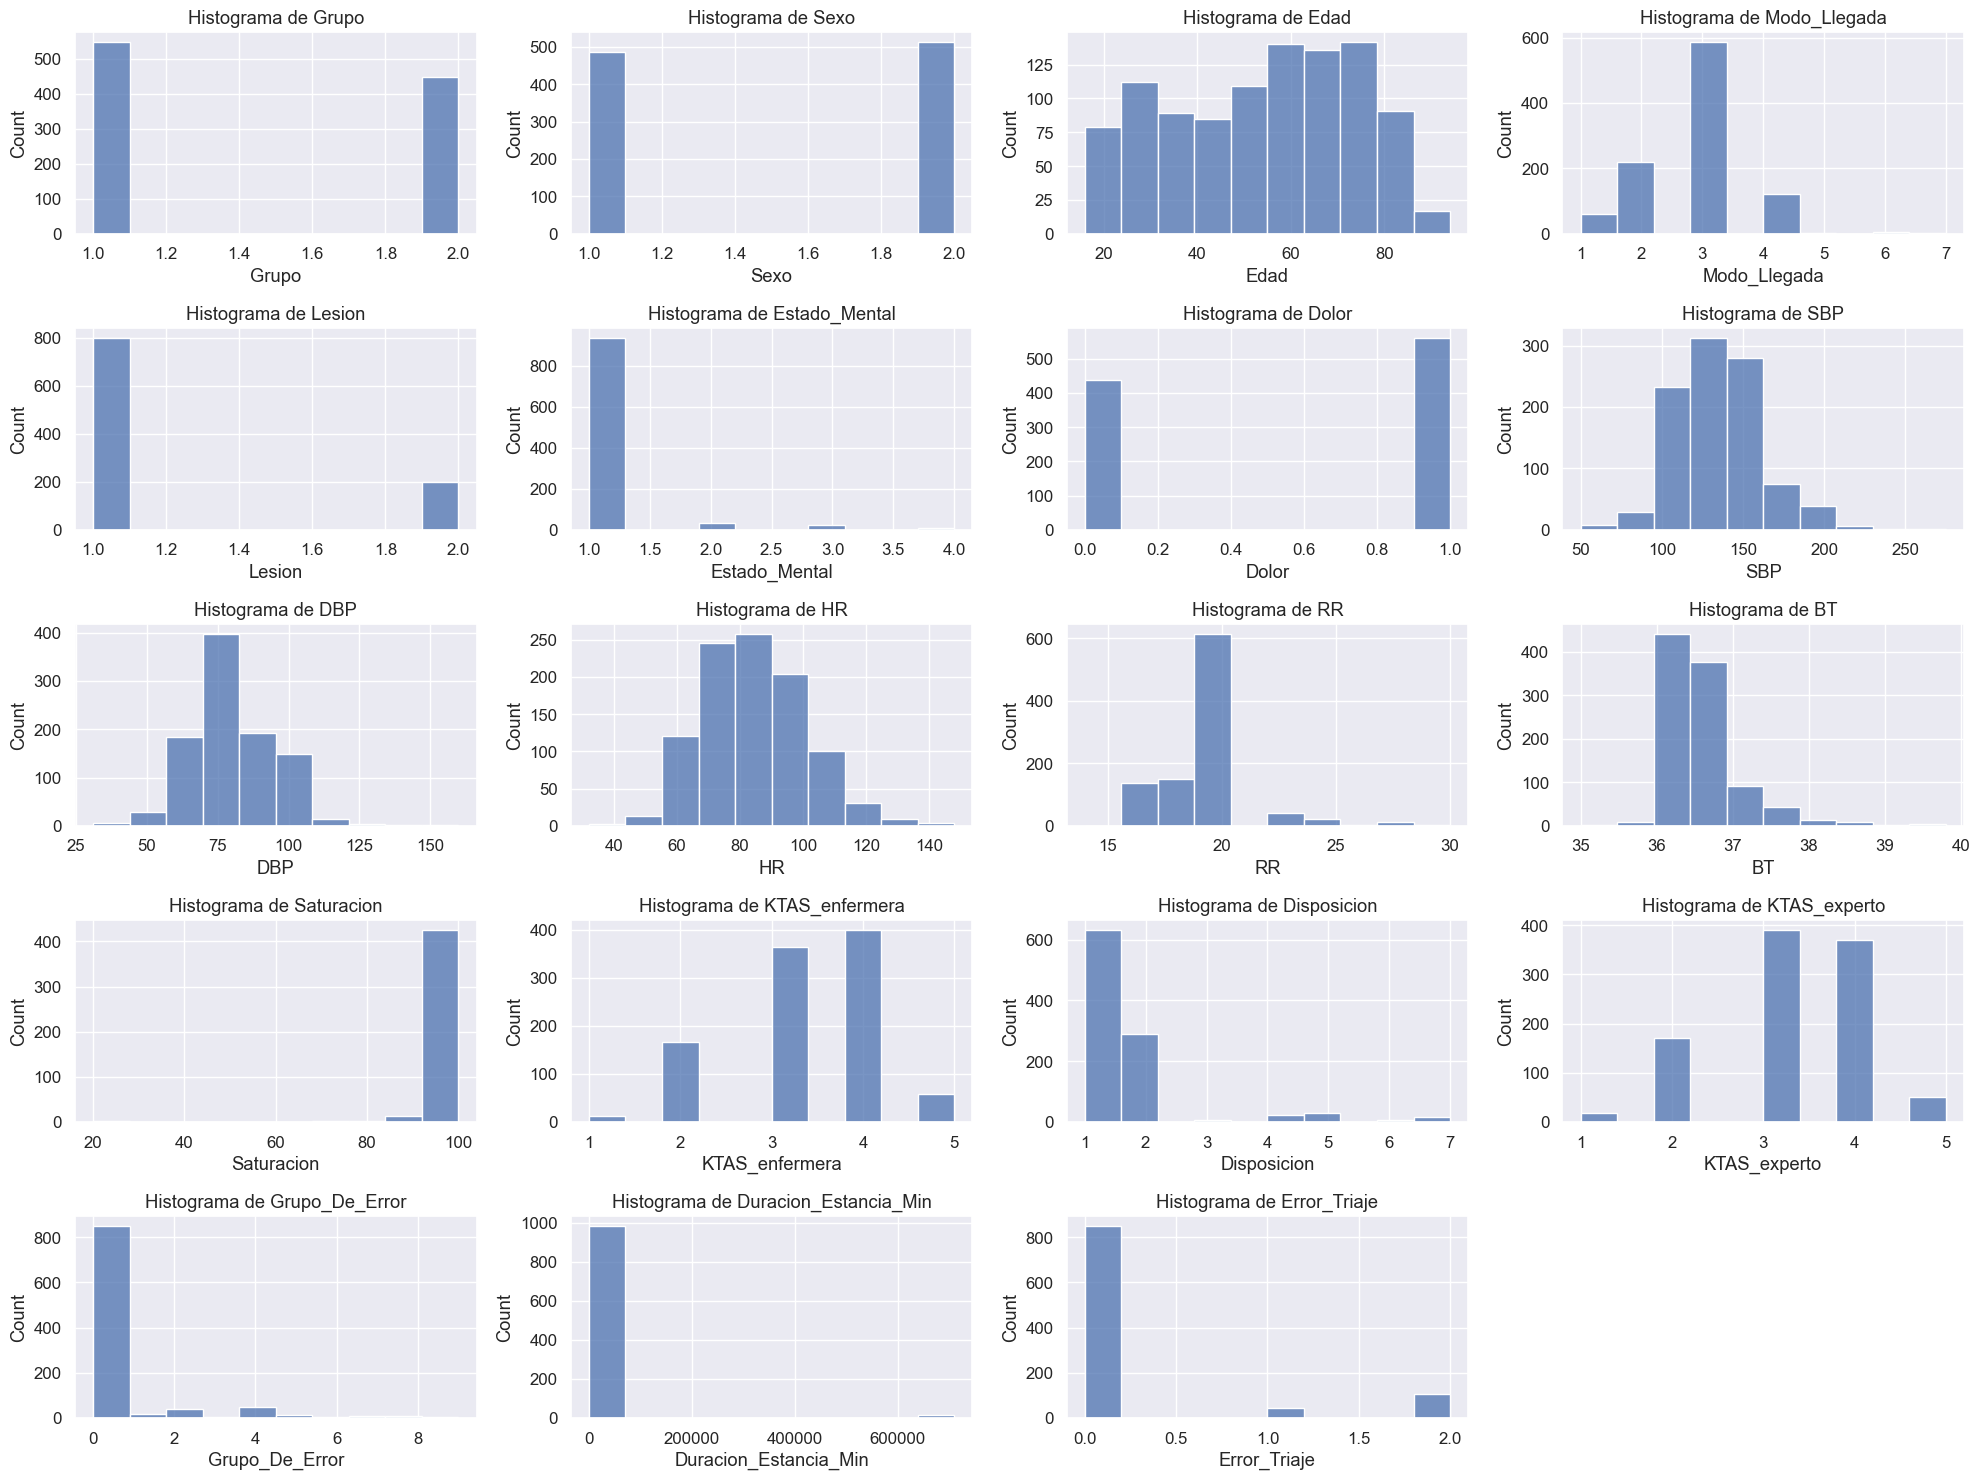

In [840]:

# Lista de características
features = ['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental', 
            'Dolor', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturacion', 
            'KTAS_enfermera', 'Disposicion', 'KTAS_experto', 
            'Grupo_De_Error', 'Duracion_Estancia_Min', 'Error_Triaje']

plt.figure(figsize=(20, 15)) 

for i, feature in enumerate(features):
    plt.subplot(5, 4, i+1)  # Crear subplots en una cuadrícula de 5 filas y 4 columnas
    sns.histplot(data=df, x=feature, kde=False, bins=10)  # Crear histograma
    plt.title(f'Histograma de {feature}')
    plt.tight_layout()

# Mostrar la gráfica
plt.show()


#### Niveles de variables categóricas

In [841]:
categoricas=['Grupo','Sexo','Modo_Llegada',"Lesion",'Queja_Principal','Estado_Mental','Dolor','dolor_NRS','KTAS_enfermera','Diagnostico_En_Urgencias','Disposicion','KTAS_experto','Grupo_De_Error','Error_Triaje']
data_categorica=df[categoricas]

levels = data_categorica.apply(pd.Series.unique)
num_levels = data_categorica.apply(pd.Series.nunique)

print(levels)
print(num_levels)

Grupo                                                                  [2, 1]
Sexo                                                                   [2, 1]
Modo_Llegada                                            [2, 4, 3, 1, 6, 5, 7]
Lesion                                                                 [1, 2]
Queja_Principal             [ant. chest pain, headache, fever & chill, dys...
Estado_Mental                                                    [1, 4, 2, 3]
Dolor                                                                  [1, 0]
dolor_NRS                              [2, 4, 3, #BOÞ!, 6, 5, 7, 8, 1, 9, 10]
KTAS_enfermera                                                [2, 3, 4, 1, 5]
Diagnostico_En_Urgencias    [Ischaemic chest pain, Subarachnoid haemorrhag...
Disposicion                                             [2, 7, 1, 5, 6, 3, 4]
KTAS_experto                                                  [2, 3, 4, 1, 5]
Grupo_De_Error                                 [0, 4, 1, 2, 6, 7

Debido a que el método `describe()` no nos proporciona información útil sobre las variables categóricas, investigaremos los niveles y el número de niveles por variable categórica. Esto nos permitirá comparar la información con el diccionario de datos y tomar decisiones informadas para la limpieza de datos y la selección de variables. Es posible observar las siguientes cosas:

1. **Modo_Llegada**: El diccionario de datos tiene codificación de 1 a 5, pero los datos tienen niveles de 1 a 7.
2. **Dolor**: Está codificado como 0 o 1 en el diccionario de datos; sin embargo, en el dataset existen las categorías 1 y 2.
3. **dolor_NRS**: Tiene un error de formato, "#BOÞ!".
4. **Error_Triaje**: No es binaria, por lo que es necesario preguntar su significado.
5. **Queja_principal y Diagnostico_En_Urgencias**: No se pueden tratar como variables categóricas debido a que tienen demasiados niveles.

#### Análisis de las observaciones:

Como determinamos que dolor_NRS tenía un error de formato, necesitamos saber a cuántas filas afecta este error para decidir cómo proceder. Es posible observar que existen demasiadas instancias del error como para eliminar las filas entonces debemos considerar eliminar la columna o imputar el error.

In [842]:
df['dolor_NRS'].value_counts()

dolor_NRS
#BOÞ!    440
3        209
4        111
5        109
6         59
2         31
7         27
8          8
10         3
1          2
9          1
Name: count, dtype: int64

El número de errores es bastante alto, pero como también se tiene la columna Dolor, podemos usarla para analizar el significado y la posible intención del recopilador de datos. 

In [843]:
d_dolor = df[df['Dolor']==0]
d_dolor['dolor_NRS'].value_counts()

dolor_NRS
#BOÞ!    438
Name: count, dtype: int64

Observamos que de las 440 instancias con el error, 438 ocurren cuando el paciente no reporta dolor. Por lo tanto, asumimos que el error se produce cuando el paciente no tiene dolor y no se le asigna un valor de dolor_NRS.

Revisamos los niveles del modo llegada debido a que existen dos niveles que no están explicado en el diccionario de datos.

In [844]:
df['Modo_Llegada'].value_counts()

Modo_Llegada
3    588
2    220
4    122
1     60
6      7
5      2
7      1
Name: count, dtype: int64

Hay solo 8 instancias con valores de 6 y 7 (que no están especificaods en el diccionario), por lo que podemos asumir que estos datos se pueden incluir en el Modo_Llegada 5.

Revisión de valores faltantes para cada una de las columnas:

In [845]:
# Número de faltantes por columna
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

Grupo                         0
Sexo                          0
Edad                          0
Modo_Llegada                  0
Lesion                        0
Queja_Principal               0
Estado_Mental                 0
Dolor                         0
dolor_NRS                     0
SBP                          17
DBP                          21
HR                           12
RR                           15
BT                           11
Saturacion                  556
KTAS_enfermera                0
Diagnostico_En_Urgencias      1
Disposicion                   0
KTAS_experto                  0
Grupo_De_Error                0
Duracion_Estancia_Min         0
Duracion_KTAS_Min             0
Error_Triaje                  0
dtype: int64


Las columnas SBP, DBP, HR, RR y BT tienen faltantes.

**Análisis de la variable objetivo:**

Revisión de como se distribuye la variable objetivo. Recordando que existian valores extremos.

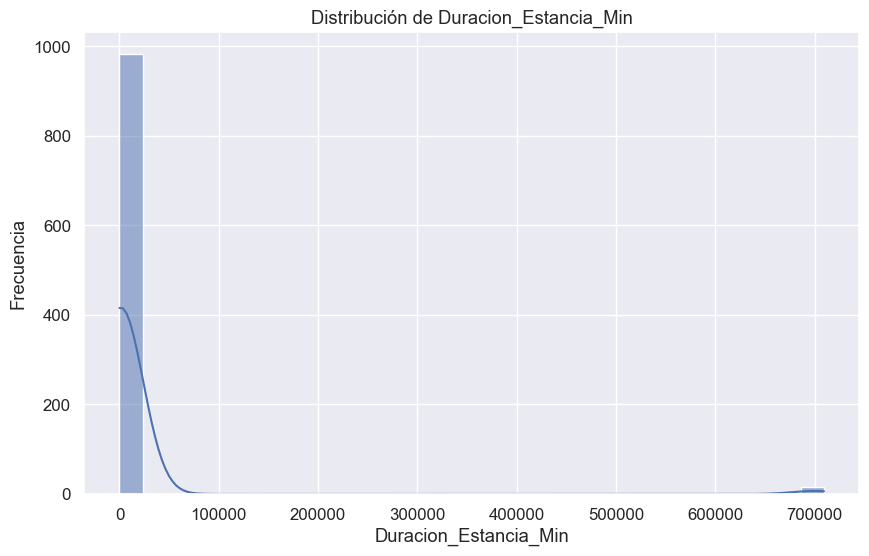

In [846]:

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

In [847]:
df[df["Duracion_Estancia_Min"] >= 10000]["Duracion_Estancia_Min"].count()

57

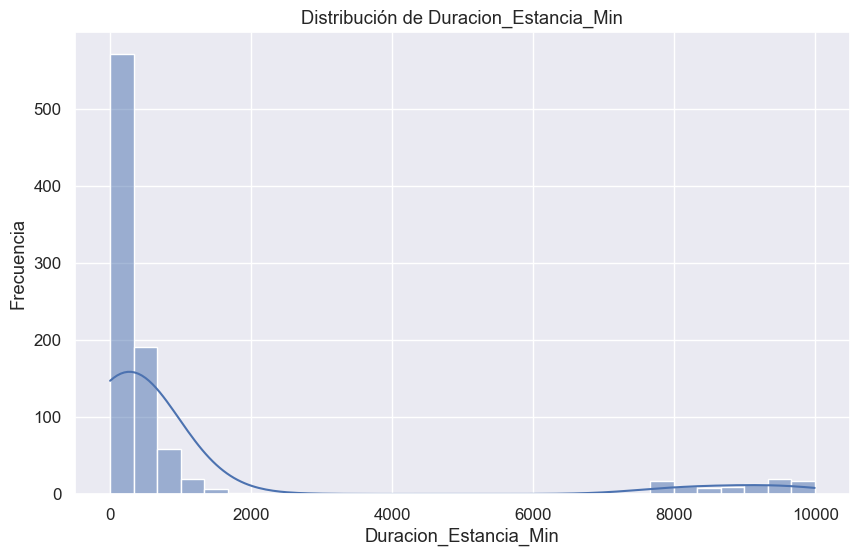

In [848]:

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df[(df["Duracion_Estancia_Min"] >= 0) & (df["Duracion_Estancia_Min"] <= 10000)]["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

In [849]:
df[df["Duracion_Estancia_Min"] >= 2100]["Duracion_Estancia_Min"].count()

151

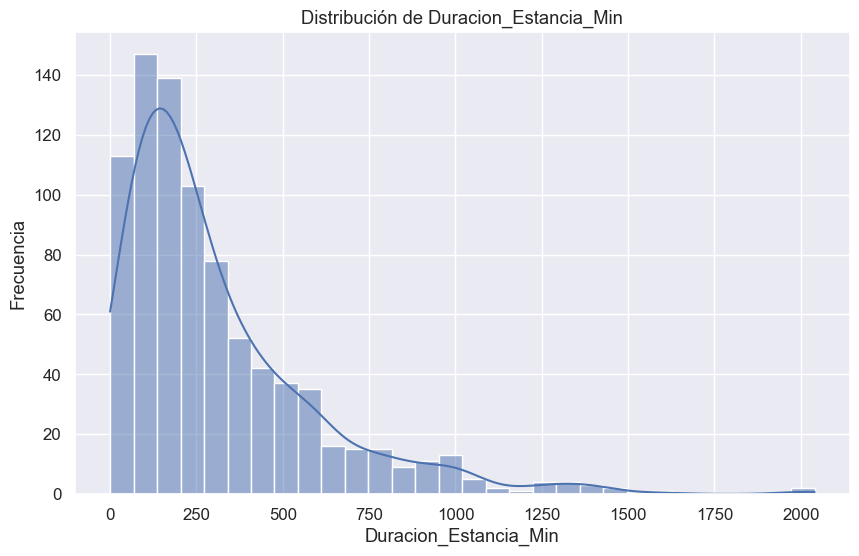

In [850]:

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df[df["Duracion_Estancia_Min"] <= 5000]["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

En las graficas se puede observar que existen valores atípicos que pueden afectar el ajuste del modelo.

### Análisis de Calidad de Datos

##### Valores Faltantes
- **Saturacion**, **BT (Temperatura Corporal)**, **dolor_NRS**, **SBP**, **DBP**, **HR**, **RR**: Tienen valores faltantes.

##### Distribución de Datos
- **Duracion_Estancia_Min**: Muestra alta variabilidad, con algunos valores extremadamente altos que podrían ser atípicos.

##### Valores Atípicos
- **Duracion_Estancia_Min**: Presenta valores extremos que pueden ser errores o casos excepcionales.

##### Consistencia de Datos
- **dolor_NRS**: Muestra un rango amplio (1 a 10) pero con una media baja, lo cual es consistente con el reporte de dolor.


### Limpieza de datos

In [851]:
# Se copia el df para no alterar los datos originales.
data = df.copy()

Se debe convertir la variable Duracion_KTAS_Min a float para que se pueda utilizar en el modelo:

In [852]:
# Conversión de String a float 
data['Duracion_KTAS_Min'] = data['Duracion_KTAS_Min'].str.replace(',', '.').astype(float)
data['Duracion_KTAS_Min'].describe()

count    1000.000000
mean        5.529710
std         3.439131
min         1.000000
25%         3.000000
50%         4.630000
75%         7.020000
max        17.370000
Name: Duracion_KTAS_Min, dtype: float64

Queja_Principal y Diagnostico_En_Urgencias son columnas de texto y no las usaremos en el primer modelo, después exploraremos el procesamiento de texto. \
Por otro lado, la saturación tiene casi la mitad de valores faltantes y por esto decidimos no utilizarla.

In [853]:
# Se quitan las columnas por la cantidad tan alta de categorías
data=data.drop(columns=['Queja_Principal','Diagnostico_En_Urgencias','Saturacion'])

Imputamos el #BOÞ! con 1 para poder usar la columna en el modelo. Esto con base en lo explorado anteriormente.

In [854]:
# Dolor BOP
data['dolor_NRS'] = pd.to_numeric(data['dolor_NRS'].replace('#BOÞ!', 1))

Cambiamos los niveles 6 y 7 de Modo_Llegada a 5 para tener la misma logica del diccionario de datos.

In [855]:
# Modo_Llegada
data['Modo_Llegada'] = data['Modo_Llegada'].replace(6, 5)
data['Modo_Llegada'] = data['Modo_Llegada'].replace(7, 5)
data['Modo_Llegada'].value_counts()

Modo_Llegada
3    588
2    220
4    122
1     60
5     10
Name: count, dtype: int64

#### Imputación de las filas con valores NaN:

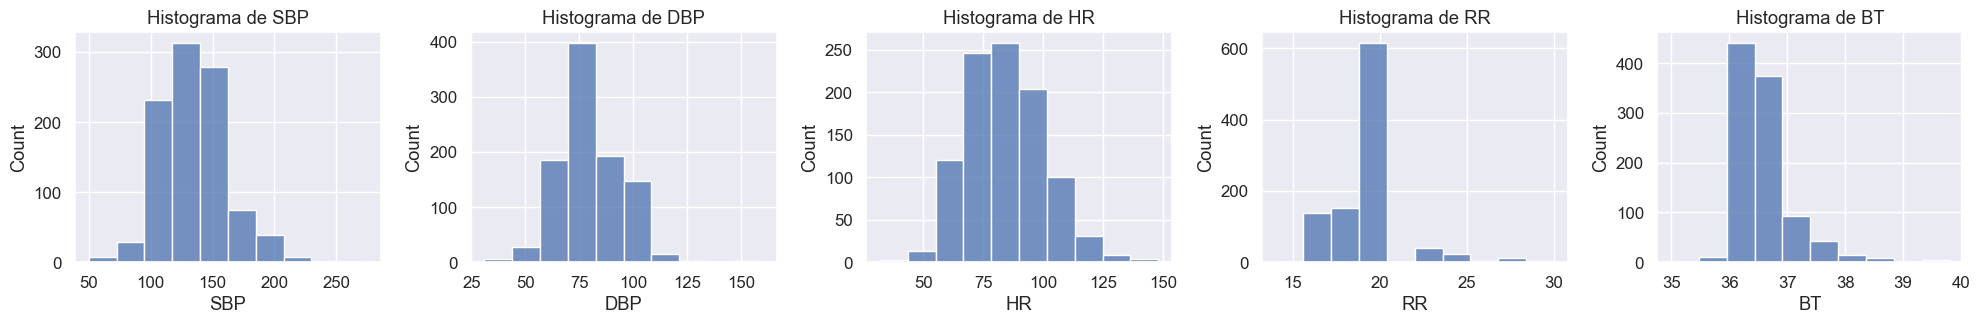

In [856]:
# Lista de características
features = ['SBP', 'DBP', 'HR', 'RR', 'BT']

plt.figure(figsize=(20, 15)) 

for i, feature in enumerate(features):
    plt.subplot(5, 5, i+1)  # Crear subplots en una cuadrícula de 5 filas y 5 columnas
    sns.histplot(data=df, x=feature, kde=False, bins=10)
    plt.title(f'Histograma de {feature}')
    plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [857]:
columnas_imputar = ['SBP', 'DBP', 'HR', 'RR', 'BT']
for columna in columnas_imputar:
    print(columna)
    print(f'Media: {data[columna].mean()}')
    print(f'Mediana: {data[columna].median()}')
    print(f'Moda: {data[columna].mode()[0]}')

SBP
Media: 133.4852492370295
Mediana: 130.0
Moda: 120.0
DBP
Media: 79.56690500510726
Mediana: 80.0
Moda: 80.0
HR
Media: 84.40080971659918
Mediana: 82.0
Moda: 80.0
RR
Media: 19.450761421319797
Mediana: 20.0
Moda: 20.0
BT
Media: 36.56299292214358
Mediana: 36.5
Moda: 36.0


A partir del comportamiento de las características y teniendo en cuenta que estas tienen valores enteros, la medida más precisa para imputar sería la moda, ya que representa el valor que aparece con mayor frecuencia y es más adecuado para este tipo de datos. La media generaría valores decimales que no son acordes a los valores originales, y la mediana también cuando el número de datos es par. 

In [858]:
# Imputar valores NaN con la media de cada columna
for columna in columnas_imputar:
    data[columna] = data[columna].fillna(data[columna].mode()[0])

Decidimos quitar los valores atípicos para mejorar el rendimiento del modelo en los casos mas comunes. Sin embargo, esto significa que el modelo no se funcionará muy bien para valores extremos.

In [859]:
# Eliminar las filas donde Duracion_Estancia_Min > 2100
data = data[data["Duracion_Estancia_Min"] <= 2100]
data["Duracion_Estancia_Min"].describe()

count     849.000000
mean      308.449941
std       285.380122
min         0.000000
25%       118.000000
50%       216.000000
75%       411.000000
max      2040.000000
Name: Duracion_Estancia_Min, dtype: float64

### Selección de Variables para el Modelado

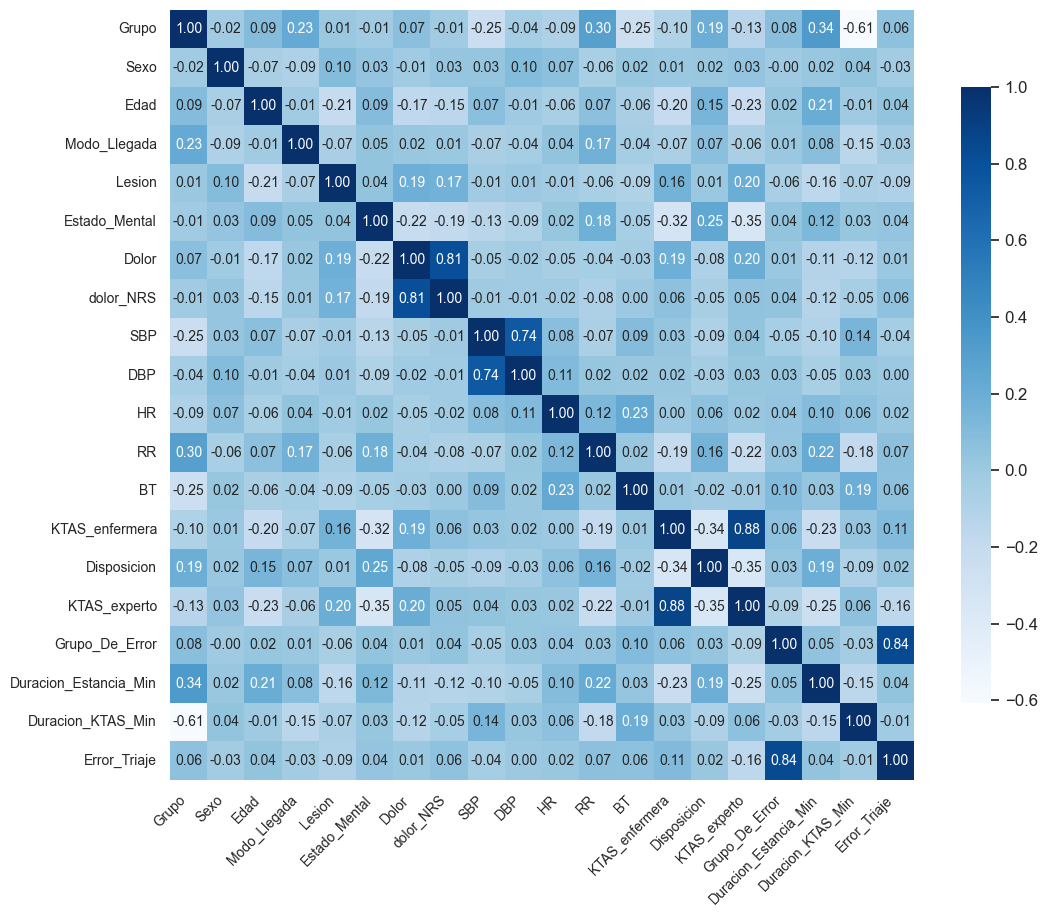

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental',
       'Dolor', 'dolor_NRS', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'KTAS_enfermera',
       'Disposicion', 'KTAS_experto', 'Grupo_De_Error',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min', 'Error_Triaje'],
      dtype='object')


In [860]:

# Calculate the correlation matrix
corr = data.corr(numeric_only= True)

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(corr, cmap="Blues", annot=True, annot_kws={"size": 10}, fmt=".2f", 
           cbar_kws={"shrink": 0.8})

# Rotate the x and y labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.show()

print(data.columns)

En la matriz de correlación es posible identificar variables correlacionadas que podrían ser eliminadas ya que una explica a la otra. Las principales son:
- Dolor con Dolor_NRS
- SBP con DBP
- KTAS_enfermera con KTAS_experto
- Grupo_De_Error con Error_Triaje

<Axes: >

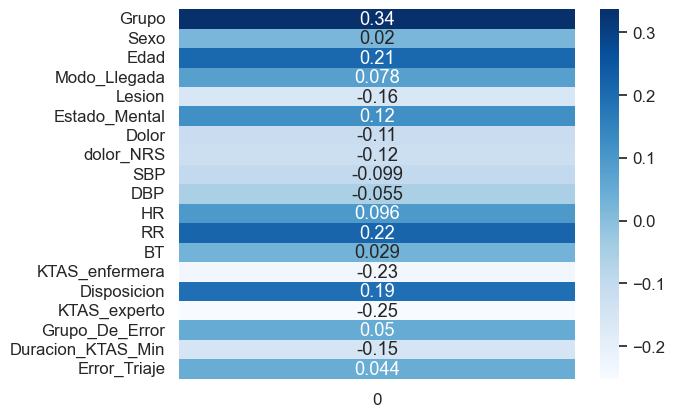

In [861]:
corrw = data.drop(['Duracion_Estancia_Min'], axis=1).corrwith(data['Duracion_Estancia_Min'], numeric_only= True)
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

Según lo observado en la matriz de correlación con la variable objetivo decidimos eliminar las columnas DBP, KTAS_enfermera y Error_Triaje, ya que tienen una menor correlación con la Duracion_Estancia_Min que SBP, KTAS_experto y Grupo_De_Error respectivamente. Además eliminamos dolor_NRS ya que tiene una alta correlación con dolor y dolor está completa y tiene mayor correlación con la variable objetivo.

In [862]:
data=data.drop(columns=['DBP', 'KTAS_enfermera', 'Error_Triaje', 'dolor_NRS', 'Grupo_De_Error'])
data.columns

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental',
       'Dolor', 'SBP', 'HR', 'RR', 'BT', 'Disposicion', 'KTAS_experto',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min'],
      dtype='object')

Ajustar los valores de las variables categóricas binarias que tienen valores 1 y 2, para que todas queden unificadas con valores 0 y 1:

In [863]:
data['Grupo'] = data['Grupo'].replace({1: 0, 2: 1})
data['Sexo'] = data['Sexo'].replace({1: 0, 2: 1})
data['Lesion'] = data['Lesion'].replace({1: 0, 2: 1})

One hot encoding para las variables categóricas con más de 2 categorías:

In [864]:
columns_to_encode = ['Disposicion', 'Modo_Llegada', 'Estado_Mental']

# Aplicamos one hot encoding
X = pd.get_dummies(data, columns=columns_to_encode, drop_first=True, dtype=int)

# Visualizamos el DataFrame resultante
X.head()

,Grupo,Sexo,Edad,Lesion,Dolor,SBP,HR,RR,BT,KTAS_experto,Duracion_Estancia_Min,Duracion_KTAS_Min,Disposicion_2,Disposicion_3,Disposicion_4,Disposicion_5,Disposicion_6,Disposicion_7,Modo_Llegada_2,Modo_Llegada_3,Modo_Llegada_4,Modo_Llegada_5,Estado_Mental_2,Estado_Mental_3,Estado_Mental_4
0,1,1,49,0,1,150.0,92.0,20.0,36.2,2,1591,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,30,0,1,140.0,76.0,20.0,36.3,3,211,3.0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,0,61,1,1,100.0,84.0,20.0,36.4,4,119,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,1,61,0,1,120.0,76.0,20.0,36.5,3,414,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,67,0,0,143.0,130.0,20.0,38.1,2,267,3.6,0,0,0,0,0,0,0,1,0,0,0,0,0


Esto se hace para convertir las variables categóricas a múltiples columnas binarias (0 y 1) que representan si la instancia pertenece o no a esa categoría en específico. Esto es útil porque la mayoría de los algoritmos de clustering basados en distancias, y crear estas nuevas columnas de categorías binarias evita atribuir relaciones numéricas a categorías que no las tienen.

### Implementación de modelos

#### Agglomerative Clustering
Implementado por: Daniela Espinosa

Preprocesamiento: Se normalizan los datos:

In [865]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Se realiza PCA (Principal Component Analysis):

Gráfico de varianza explicada acumulada:

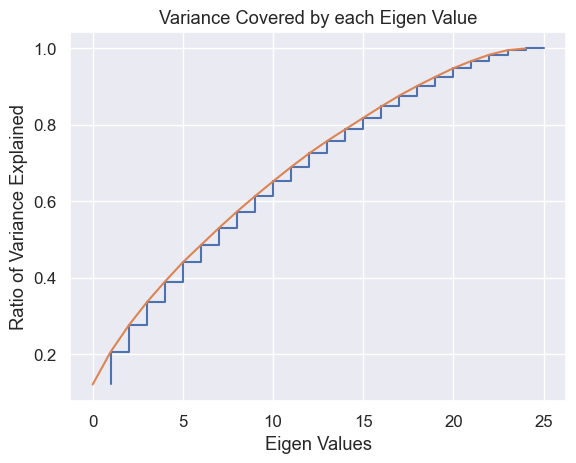

In [866]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(X_scaled))

pca.explained_variance_
max = len(pca.explained_variance_) + 1

plt.step(list(range(1,max)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

Este gráfico te permite decidir cuántos componentes principales deberías conservar. En este caso, con 12 componentes se explica más del 90% de la varianza, por lo que se reduce la dimensionalidad a 12.

In [867]:
pca = PCA(n_components = 18) 
X_principal = pca.fit_transform(X_scaled) 
X_principal = pd.DataFrame(X_principal) 

Construcción del Dendograma:

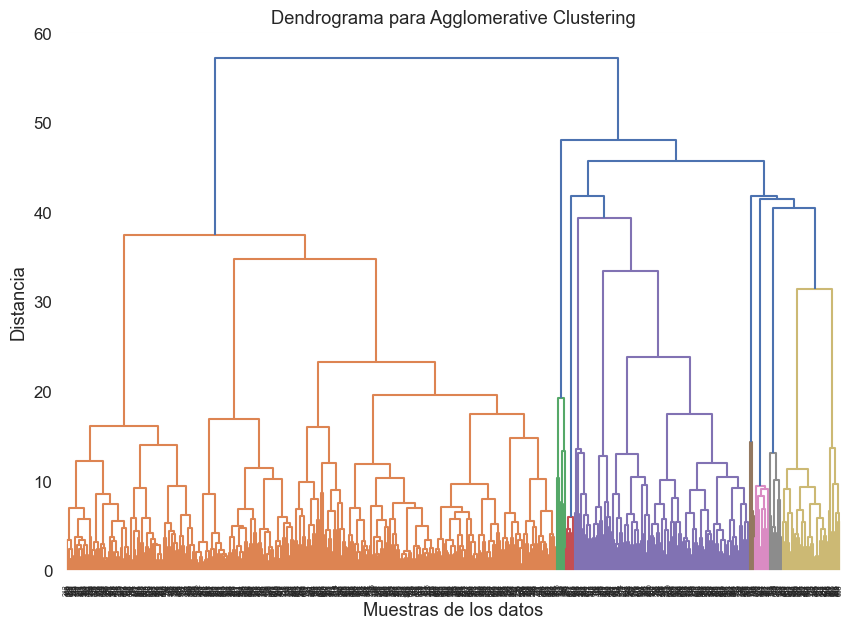

In [868]:
linked = linkage(X_principal, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma para Agglomerative Clustering')

plt.xlabel('Muestras de los datos')
plt.ylabel('Distancia')
plt.show()

A partir del Dendograma, parecería que el número óptimo de clusters sería 8, observando que hay tres clusters principales (naranja, morado y amarillo), y 5 más pequeños que parecen ser outliers. Este número se determina trazando líneas horizontales imaginarias entre cada dos bifurcaciones del árbol. Se elige la línea horizontal que maximice la suma del largo de las ramas verticales que la intersecan, y ese sería el número de clusters que puede ser el indicado. (En el gráfico, las lineas verticales azules serían las que atraviesan la línea horizonal).

Sin embargo, en la práctica no siempre es la herramienta más precisa o definitiva para tomar esa decisión, ya que está basado en la idea de agrupamiento jerárquico, lo que puede no ser adecuado para todos los tipos de datos. Por lo que se probarán diferentes configuraciones.

PCA en 3 componentes para poder visualizar los datos en 3D:

In [869]:
pca3 = PCA(n_components = 3) 
X_pca3 = pca3.fit_transform(X_principal) 
X_pca3 = pd.DataFrame(X_pca3)
X_pca3.columns = ['P1', 'P2', 'P3'] 

Modelo con linkage = 'single', 8 clusters

In [870]:
ac3_s = AgglomerativeClustering(n_clusters = 8, linkage = 'single') 
labels3_s = ac3_s.fit_predict(X_principal)

# Visualización en 3D con plotly
fig = px.scatter_3d(
    X_pca3, x='P1', y='P2', z='P3', 
    color=labels3_s, 
    title='Agglomerative Clustering (3D PCA Visualización)',
    labels={'P1': 'Principal Component 1', 'P2': 'Principal Component 2', 'P3': 'Principal Component 3'},
    color_continuous_scale='Viridis'
)
fig.show()

# Evaluación del Modelo
sil_score = silhouette_score(X_principal, labels3_s)
davies_bouldin = davies_bouldin_score(X_principal, labels3_s)
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Score: {davies_bouldin}')


Silhouette Score: 0.45952543350117037
Davies-Bouldin Score: 0.7139169715963125


El linkage 'single' no agrupa adecuadamente los datos, ya que hay un cluster muy grande y los demás muy pequeños.

Modelo con linkage = 'average', 8 clusters

In [871]:
ac3_av = AgglomerativeClustering(n_clusters = 8, linkage = 'average') 
labels3_av = ac3_av.fit_predict(X_principal)

# Visualización en 3D con plotly
fig = px.scatter_3d(
    X_pca3, x='P1', y='P2', z='P3', 
    color=labels3_av, 
    title='Agglomerative Clustering (3D PCA Visualización)',
    labels={'P1': 'Principal Component 1', 'P2': 'Principal Component 2', 'P3': 'Principal Component 3'},
    color_continuous_scale='Viridis'
)
fig.show()

# Evaluación del Modelo
sil_score = silhouette_score(X_principal, labels3_av)
davies_bouldin = davies_bouldin_score(X_principal, labels3_av)
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.44468768688160665
Davies-Bouldin Score: 0.8873422660460879


Con linkage 'average' tampoco hace un buen trabajo ya que hay un cluster muy grande y los demás muy pequeños.

Modelo con linkage = 'ward', 8 clusters

In [872]:
ac4_w = AgglomerativeClustering(n_clusters = 8, linkage='ward') 
labels4_w = ac4_w.fit_predict(X_principal)

# Visualización en 3D 
fig = px.scatter_3d(
    X_pca3, x='P1', y='P2', z='P3', 
    color=labels4_w, 
    title='Agglomerative Clustering (3D PCA Visualización)',
    labels={'P1': 'Principal Component 1', 'P2': 'Principal Component 2', 'P3': 'Principal Component 3'},
    color_continuous_scale='Viridis'
)
fig.show()

# Evaluación del Modelo
sil_score = silhouette_score(X_principal, labels4_w)
davies_bouldin = davies_bouldin_score(X_principal, labels4_w)
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.22428453821399352
Davies-Bouldin Score: 1.362252008314729


Con linkage 'ward' se ve una división de los clusters más balanceada y razonable. Sin embargo, y de la misma forma que en el dendograma, solo se evidencian 3 clusters principales, y 5 más pequeños que parecen ser outliers. Entonces, se revisa el número de datos que tiene cada cluster:

El numero de clientes por cluster es:


{0: 191, 1: 538, 2: 10, 3: 64, 4: 6, 5: 10, 6: 16, 7: 14}

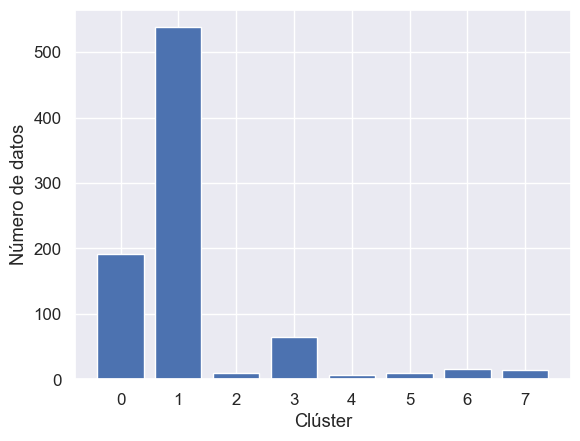

In [873]:
indexes, values = np.unique(labels4_w, return_counts=True)
rects = plt.bar(indexes, values)
plt.xlabel('Clúster')
plt.ylabel('Número de datos')
plt.xticks(indexes)
print('El numero de clientes por cluster es:')
{indexes[i]: values[i] for i in range(len(indexes))}

Evidentemente, los clusters 2, 4, 5, 6 y 7 tienen muy pocos datos, por lo que se consideran outliers. Sin embargo, como son tantos y representan casi 50 pacientes, se considera modificar el número de clusters para crear grupos más significativos y agrupar los outliers dentro de otros clusters. 

In [874]:
final_model = AgglomerativeClustering(n_clusters = 5, linkage='ward') 
labels_ac = final_model.fit_predict(X_principal)

Revisar el número de datos que tiene cada cluster:

El numero de clientes por cluster es:


{0: 201, 1: 94, 2: 10, 3: 538, 4: 6}

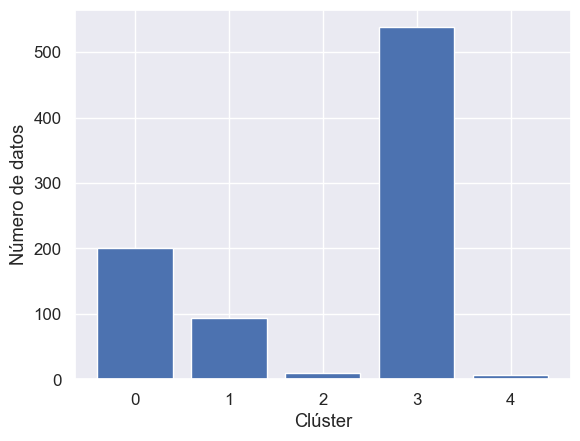

In [875]:
indexes, values = np.unique(labels_ac, return_counts=True)
rects = plt.bar(indexes, values)
plt.xlabel('Clúster')
plt.ylabel('Número de datos')
plt.xticks(indexes)
print('El numero de clientes por cluster es:')
{indexes[i]: values[i] for i in range(len(indexes))}

Como vemos, en el cluster 2 solo hay 10 pacientes, y en el 4 solo hay 6, lo que reduce el número de pacientes en clusters considerados outliers. 

A continuación, estos se eliminarán para poder analizar correctamente los otros tres clusters que son los más relevantes.

#### Interpretabilidad de los clusters

Reversión del One hot encoding para tener una mejor visualización de los datos:

In [876]:
data_og = X.copy()

# Variables categóricas (ya codificadas) que necesitan ser revertidas
original_columns = ['Disposicion', 'Modo_Llegada', 'Estado_Mental']

for col in original_columns:
    # Filtrar las columnas que pertenecen a cada variable original 
    one_hot_cols = [c for c in data_og.columns if c.startswith(col + '_')]
    
    # Crear una columna que retome el valor de la categoría original
    data_og[col] = data_og[one_hot_cols].apply(lambda row: int(row.idxmax().split('_')[-1]) if row.max() == 1 else 1, axis=1)
    
    # Eliminar las columnas one-hot codificadas
    data_og.drop(one_hot_cols, axis=1, inplace=True)

data_og.head()

,Grupo,Sexo,Edad,Lesion,Dolor,SBP,HR,RR,BT,KTAS_experto,Duracion_Estancia_Min,Duracion_KTAS_Min,Disposicion,Modo_Llegada,Estado_Mental
0,1,1,49,0,1,150.0,92.0,20.0,36.2,2,1591,2.0,2,2,1
1,1,1,30,0,1,140.0,76.0,20.0,36.3,3,211,3.0,7,4,1
2,1,0,61,1,1,100.0,84.0,20.0,36.4,4,119,2.0,1,3,1
3,1,1,61,0,1,120.0,76.0,20.0,36.5,3,414,2.0,1,3,1
4,0,1,67,0,0,143.0,130.0,20.0,38.1,2,267,3.6,1,3,1


Agregar las etiquetas (clusters) a los datos originales, y quitar los clusters 2 y 4:

In [890]:
data_ac = data_og.copy()
data_ac['Cluster'] = labels_ac
data_ac = data_ac[~data_ac['Cluster'].isin([2,4])]
data_ac['Cluster'] = data_ac['Cluster'].replace(3, 2)

# Agrupamos los datos por el clúster asignado y observamos estadísticas descriptivas
cluster_summary = data_ac.groupby('Cluster').agg({
    'Grupo': ['mean', 'std', 'median'],
    'Sexo': ['mean', 'std', 'median'],
    'Edad': ['mean', 'std', 'median'],
    'Modo_Llegada': ['mean', 'std', 'median'],
    'Lesion': ['mean', 'std', 'median'],
    'Estado_Mental': ['mean', 'std', 'median'],
    'Dolor': ['mean', 'std', 'median'],
    'SBP': ['mean', 'std', 'median'],
    'HR': ['mean', 'std', 'median'],
    'RR': ['mean', 'std', 'median'],
    'BT': ['mean', 'std', 'median'],
    'Disposicion': ['mean', 'std', 'median'],
    'KTAS_experto': ['mean', 'std', 'median'],
    'Duracion_Estancia_Min': ['mean', 'std', 'median'],
    'Duracion_KTAS_Min': ['mean', 'std', 'median']
})

# Mostrar el resumen del clúster
cluster_summary

Grupo                       Sexo                        Edad  \
             mean       std median      mean       std median       mean   
Cluster                                                                    
0        0.213930  0.411102    0.0  0.577114  0.495251    1.0  57.318408   
1        0.723404  0.449713    1.0  0.531915  0.501656    1.0  62.351064   
2        0.336431  0.472928    0.0  0.485130  0.500244    0.0  49.429368   

                          Modo_Llegada                     Lesion            \
               std median         mean       std median      mean       std   
Cluster                                                                       
0        19.318595   59.0     2.169154  0.742458    2.0  0.258706  0.439017   
1        18.475620   68.0     3.542553  0.771326    4.0  0.180851  0.386959   
2        19.301770   50.0     2.819703  0.571696    3.0  0.215613  0.411630   

               Estado_Mental                      Dolor                   \
        median          mean       std median      mean       std median   
Cluster                                                                    
0          0.0      1.139303  0.374830    1.0  0.472637  0.500497    0.0   
1          0.0      1.361702  0.745612    1.0  0.478723  0.502226    0.0   
2          0.0      1.000000  0.000000    1.0  0.622677  0.485168    1.0   

                SBP                           HR                           RR  \
               mean        std median       mean        std median       mean   
Cluster                                                                         
0        137.895522  27.518976  140.0  84.298507  16.816969   81.0  19.174129   
1        124.702128  27.208407  120.0  84.457447  15.832229   82.5  20.425532   
2        136.488848  26.067897  133.5  84.416357  15.462138   82.0  19.113383   

                                 BT                  Disposicion            \
              std median       mean       std median        mean       std   
Cluster                                                                      
0        2.326914   20.0  36.545274  0.484242  36.50    1.572139  0.903338   
1        2.637567   20.0  36.487234  0.605572  36.35    3.074468  2.080319   
2        1.819655   20.0  36.585130  0.523633  36.50    1.176580  0.381668   

               KTAS_experto                  Duracion_Estancia_Min  \
        median         mean       std median                  mean   
Cluster                                                              
0          1.0     3.159204  0.783918    3.0            366.228856   
1          2.0     2.659574  0.810591    3.0            459.021277   
2          1.0     3.553903  0.753560    4.0            257.394052   

                           Duracion_KTAS_Min                   
                std median              mean       std median  
Cluster                                                        
0        355.113837  250.0          6.202886  3.514678   5.30  
1        292.128856  416.0          4.361064  2.694780   4.00  
2        236.723831  182.0          6.143216  3.633815   5.11

Creac los gráficos del comportamiento de las variables según su cluster

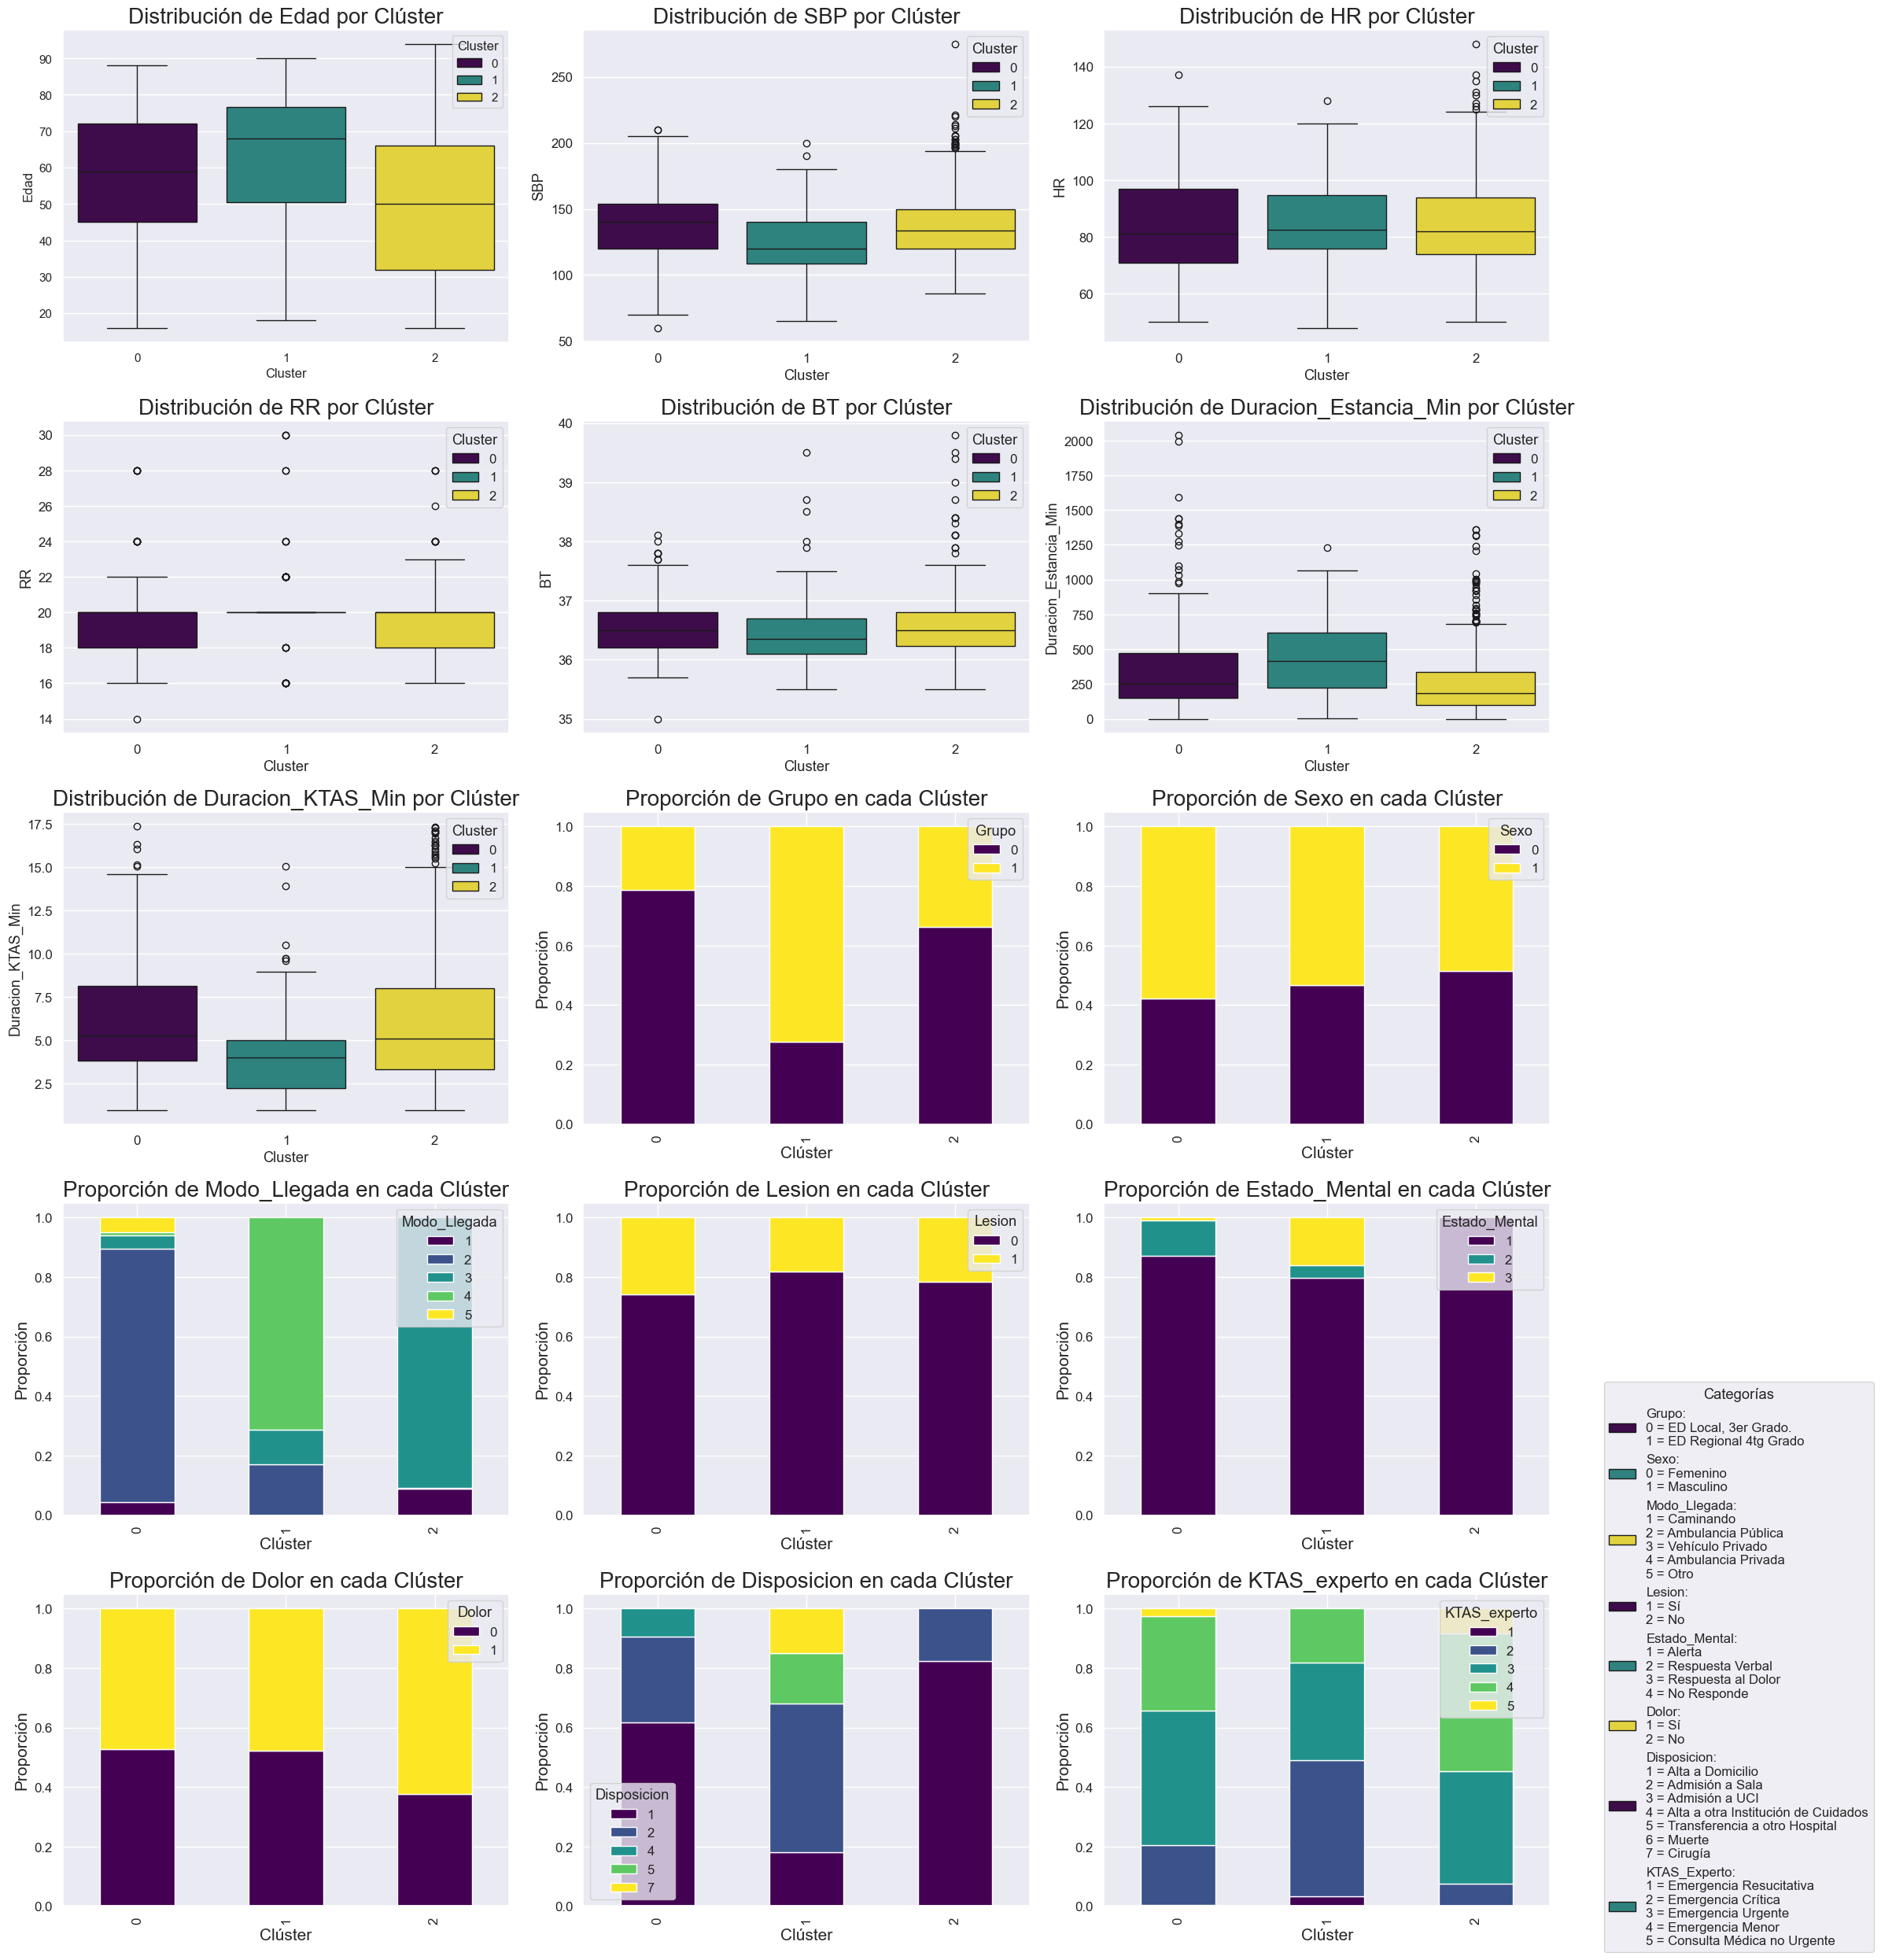

In [891]:
# Definir las variables categóricas y numéricas
numerical_features = ['Edad', 'SBP', 'HR', 'RR', 'BT', 'Duracion_Estancia_Min', 'Duracion_KTAS_Min']
categorical_features = ['Grupo', 'Sexo', 'Modo_Llegada', 'Lesion', 'Estado_Mental', 'Dolor', 'Disposicion', 'KTAS_experto']

# Crear una figura grande con subplots
total_features = len(numerical_features) + len(categorical_features)
rows = (total_features + 2) // 3  # Número de filas para los subplots
plt.figure(figsize=(20, rows * 5))

# Colores para las categorías
palette = sns.color_palette('viridis', n_colors=5)

# Crear los boxplots para las variables numéricas
for i, feature in enumerate(numerical_features):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x='Cluster', y=feature, hue = 'Cluster', data=data_ac, palette='viridis')
    sns.set(font_scale=1.1)
    plt.title(f'Distribución de {feature} por Clúster', fontsize=20)
    plt.tight_layout()

# Crear gráficos de barras apiladas para las variables categóricas
for i, feature in enumerate(categorical_features):
    plt.subplot(rows, 3, len(numerical_features) + i + 1)
    
    # Contar la proporción de cada categoría por cluster
    cluster_dist = pd.crosstab(data_ac['Cluster'], data_ac[feature], normalize='index')
    
    # Graficar usando seaborn
    cluster_dist.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
    plt.title(f'Proporción de {feature} en cada Clúster', fontsize=20)
    plt.ylabel('Proporción', fontsize=15)
    plt.xlabel('Clúster', fontsize=15)
    plt.legend(title=feature)
    plt.tight_layout()

legend_labels = [
    'Grupo:\n0 = ED Local, 3er Grado.\n1 = ED Regional 4tg Grado',
    'Sexo:\n0 = Femenino\n1 = Masculino',
    'Modo_Llegada:\n1 = Caminando\n2 = Ambulancia Pública\n3 = Vehículo Privado\n4 = Ambulancia Privada\n5 = Otro',
    'Lesion:\n1 = Sí\n2 = No',
    'Estado_Mental:\n1 = Alerta\n2 = Respuesta Verbal\n3 = Respuesta al Dolor\n4 = No Responde',
    'Dolor:\n1 = Sí\n2 = No',
    'Disposicion:\n1 = Alta a Domicilio\n2 = Admisión a Sala\n3 = Admisión a UCI\n4 = Alta a otra Institución de Cuidados\n5 = Transferencia a otro Hospital\n6 = Muerte\n7 = Cirugía',
    'KTAS_Experto:\n1 = Emergencia Resucitativa\n2 = Emergencia Crítica\n3 = Emergencia Urgente\n4 = Emergencia Menor\n5 = Consulta Médica no Urgente'
]

plt.figlegend(legend_labels, bbox_to_anchor=(1.2, 0), loc='lower right', title='Categorías')
plt.show()


#### Interpretación del comportamiento de las características para cada cluster:

**Edad y Duración de Estancia:**

Se puede observar una clara diferencia en la edad entre los clusters. El cluster 1 contiene personas más personas de edad avanzada, el cluster 0 contiene personas con edades intermedias y un poco más variadas, y el cluster 2 tiene sobre todo personas más jóvenes. Luego, podemos ver que la duración de estancia es mayor para el cluster 1, y menor para el cluster 0 y 2. Esto quiere decir que a medida que la edad aumenta, la duración de estancia también tiende a aumentar, lo que sugiere que las personas mayores requieren una atención más prolongada.

**KTAS Experto:**

Además, podemos ver que la gravedad de la emergencia también cambia según la edad. Para el cluster 1 las categorías KTAS asignadas por el experto incluyen 1 (Emergencia Resucitativa), 2 (Emergencia Crítica), 3 (Emergencia Urgente) y 4 (Emergencia Menor), siendo la número 2 la más frecuente. Mientras que para el cluster 0 es más frecuente la categoría 3, y para el cluster es más frecuente la categoría 4. Además, en ninguno de estos dos clusters hay pacientes con KTAS = 1 y es más frecuente el KTAS = 5 (Consulta médica no urgente). Esto sugiere que las personas mayores tienden a presentarse con urgencias más graves que las personas más jóvenes, ya que con una edad más avanzada tienen más riesgos, lo que también refuerza el hecho de que la duración de estancia tiende a ser más larga.

**Duración KTAS:**

Relacionado con lo anterior, vemos que la duración del diagnóstico del KTAS por el experto varía según los clusters. Para el cluster 1, que por lo general son personas mayores con emergencias más críticas, el diagnóstico es mucho más rápido porque seguramente es muy evidente su condición y la prioridad es empezar a tratar al paciente. Luego, para los otros dos clusters las duraciones del diagnóstico son similares y son más altas, lo que indica que estos pacientes pueden tener casos más complejos que requieran evaluaciones más detalladas o una intervención más prolongada.


**Estado Mental y Disposición:**

Aunque la **disposición** y el **estado mental** parecen tener poca variación en algunos clusters, hay algunos valores atípicos (outliers) en el cluster 0, lo que sugiere que algunos de estos pacientes mayores pueden tener problemas mentales o de disposición más complejos, incluida la muerte que es el valor 6 y se presenta solo en este cluster.


**Modo de llegada:**

También se ven diferencias en el **modo de llegada** de los clusters. El cluster 0 llega con más frecuencia en ambulancia pública, el cluster 1 en ambulancia privada, y el cluster 2 en vehículo privado. Esto tiene sentido por las edades, ya que es más probable que un adulto mayor con una emergencia crítica llegue en ambulancia mientras que alguien más joven con una emergencia menor llegue en vehículo privado.


**Grupo:** 

La variable **Grupo** tiene una variación entre clusters, ya que el cluster 1  pertenece sobre todo al grupo 1 (ED Local, 3er Grado) y los otros dos clusters sobretodo al grupo 2 (ED Regional 4tg Grado).


**Disposición:** 

Se puede observar que el cluster 2 tiene únicamente pacientes con valores de disposición iguales a 1 (Alta a Domicilio) o 2 (Admisión a Sala), y la mayoría son igual a 1. El cluster 1 es muy parecido, pero incluye también algunos pacientes con Disposición igual a 3 (Admisión a UCI). Y por último, el cluster 0 tiene muchos pacientes tanto con Disposición igual a 2, como igual a 5 (Transferencia a otro Hospital) y 7 (Cirugía). Esto muestra de nuevo que el cluster 2 tiene pacientes jóvenes con condiciones menores, el cluster 1 con condiciones ligeramente más graves y pacientes más adultos, y por último el cluster 0 con condiciones más graves y edades más avanzadas.    


Otras características:
 
El **Dolor** es parejo en los clusters 0 y 1, mientras que el cluster 2 tiene más pacientes uqe presentan dolor, lo que podría estar relacionado con el tipo de afección o trauma que presentan los pacientes en cada grupo.

En cuanto a la **temperatura corporal (BT)**, no hay diferencias muy marcadas ya que en general la mayoría de personas llega con una temperatura normal. La **frecuencia respiratoria (RR)**, **Frecuencia Cardíaca (HR)** y la **presión arterial (SBP)** tampoco cambian considerablemente, ya que estas por lo general no cambian tanto con la edad, sino solo por alguna condición en específico del paciente.

En cuanto al **sexo** y si hay alguna **lesión** o no, no parece haber diferencias significativas, lo que indica que estos factores no fueron determinantes en la agrupación.

#### Modelo K-means
Implementado por: Juana Mejía

In [892]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [893]:
def buscar_modelo(k, semilla):
    print(f"Entrenando el modelo con k={k} y semilla={semilla}.")
    model = KMeans(n_clusters=k,random_state=semilla, init='random', n_init=1)
    model.fit(X)

    return model.inertia_
candidatos = [9,22,33,42,50]
grupos = range(2,10)
distorsions = dict()

for semilla in candidatos:
    distorsions[semilla] = list()
    for k in grupos:
        inertia = buscar_modelo(k, semilla)
        distorsions[semilla].append(inertia)
        print("Score:",inertia)
        print('-'*50)

Entrenando el modelo con k=2 y semilla=9.
Score: 24666689.91695151
--------------------------------------------------
Entrenando el modelo con k=3 y semilla=9.
Score: 12880279.118899995
--------------------------------------------------
Entrenando el modelo con k=4 y semilla=9.
Score: 8672005.716284495
--------------------------------------------------
Entrenando el modelo con k=5 y semilla=9.
Score: 6654264.736273406
--------------------------------------------------
Entrenando el modelo con k=6 y semilla=9.
Score: 4499570.278875652
--------------------------------------------------
Entrenando el modelo con k=7 y semilla=9.
Score: 3792288.1787323332
--------------------------------------------------
Entrenando el modelo con k=8 y semilla=9.
Score: 3484735.875176891
--------------------------------------------------
Entrenando el modelo con k=9 y semilla=9.
Score: 2973677.719028522
--------------------------------------------------
Entrenando el modelo con k=2 y semilla=22.
Score: 2466

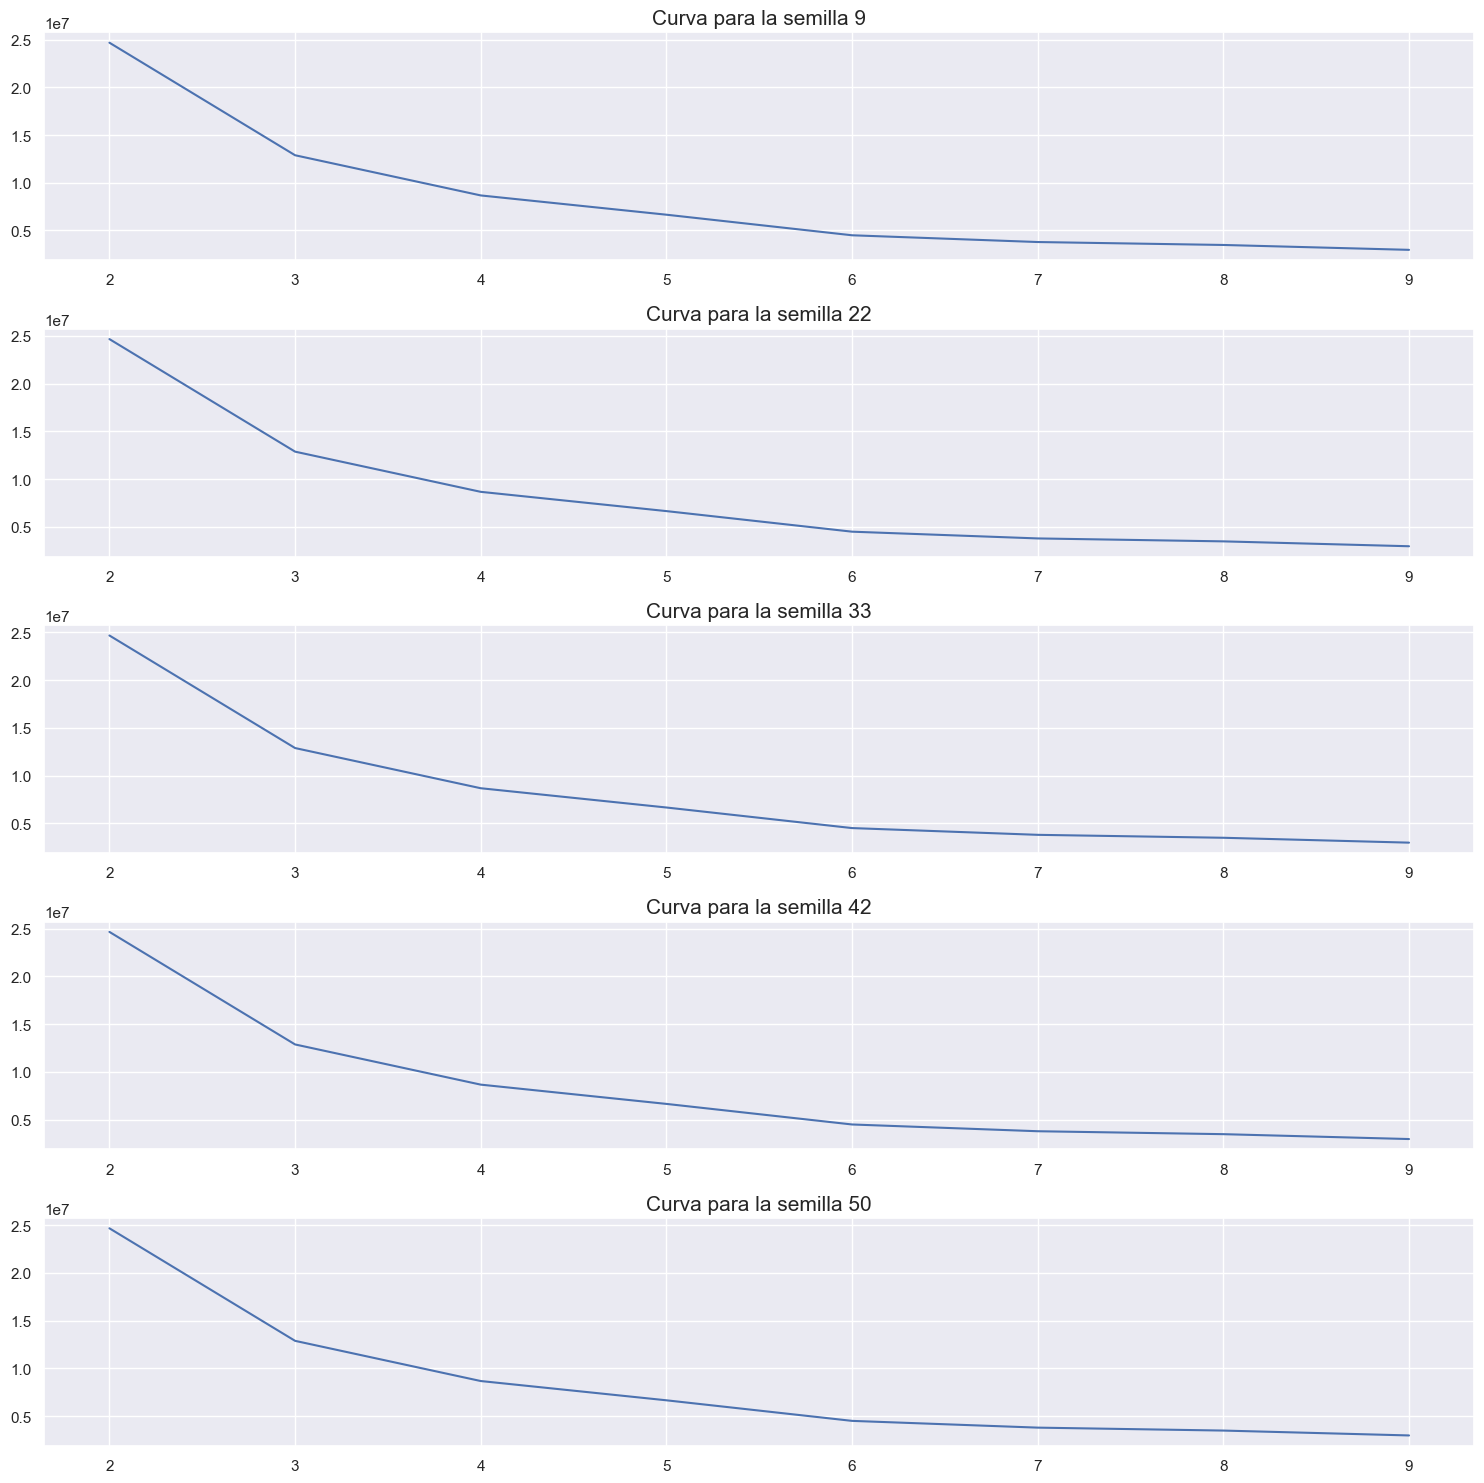

In [904]:
fig = plt.figure(figsize=(15, 15))

for i, sem in enumerate(candidatos):
    ax = plt.subplot(len(candidatos), 1, i + 1)
    plt.plot(grupos, distorsions[sem])
    plt.grid(True)
    plt.title(f'Curva para la semilla {sem}', fontsize=15)
    plt.tight_layout()
plt.show()

Gracias a este grafico podemos revisar que para todas las diferentes semillas k=3 es el valor optimo para los grupos en el kmeans, esto se debe a que luego de este se obtiene un comportamiento casi lineal.

### Metodo de la silueta

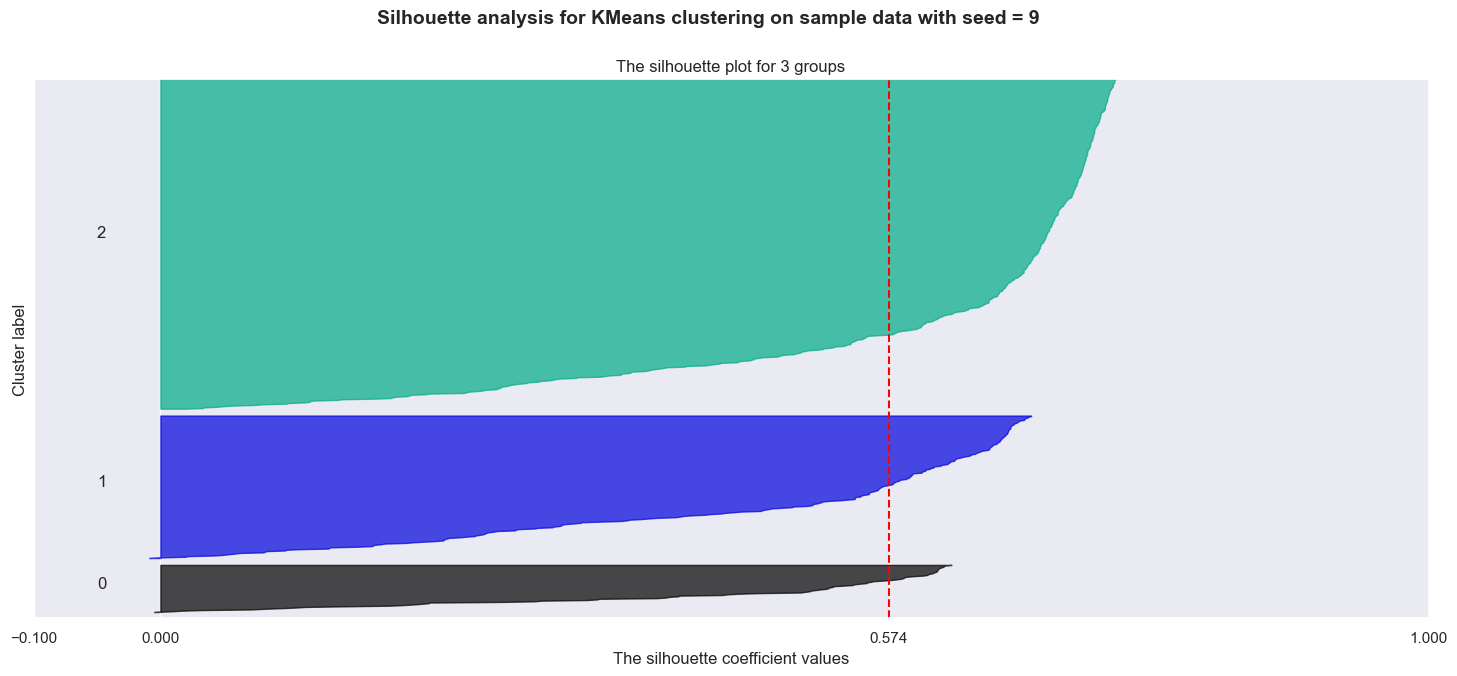

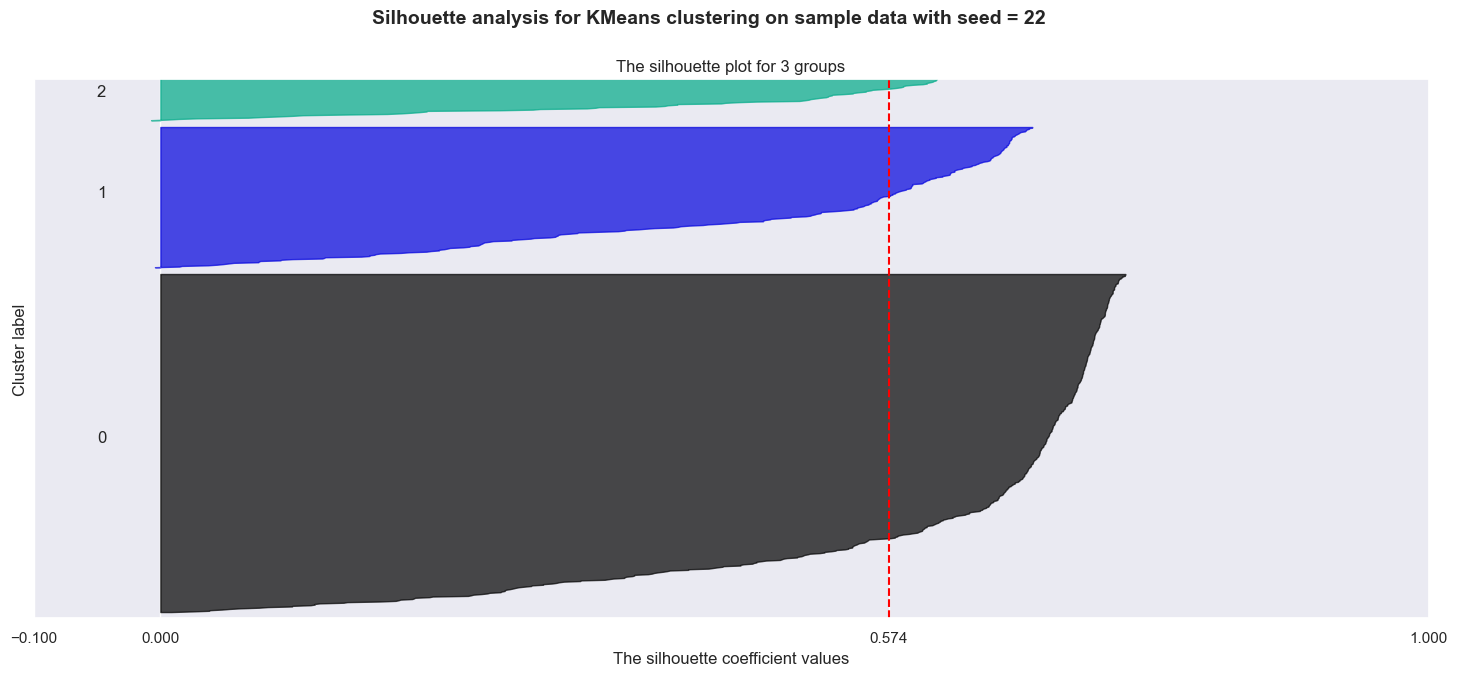

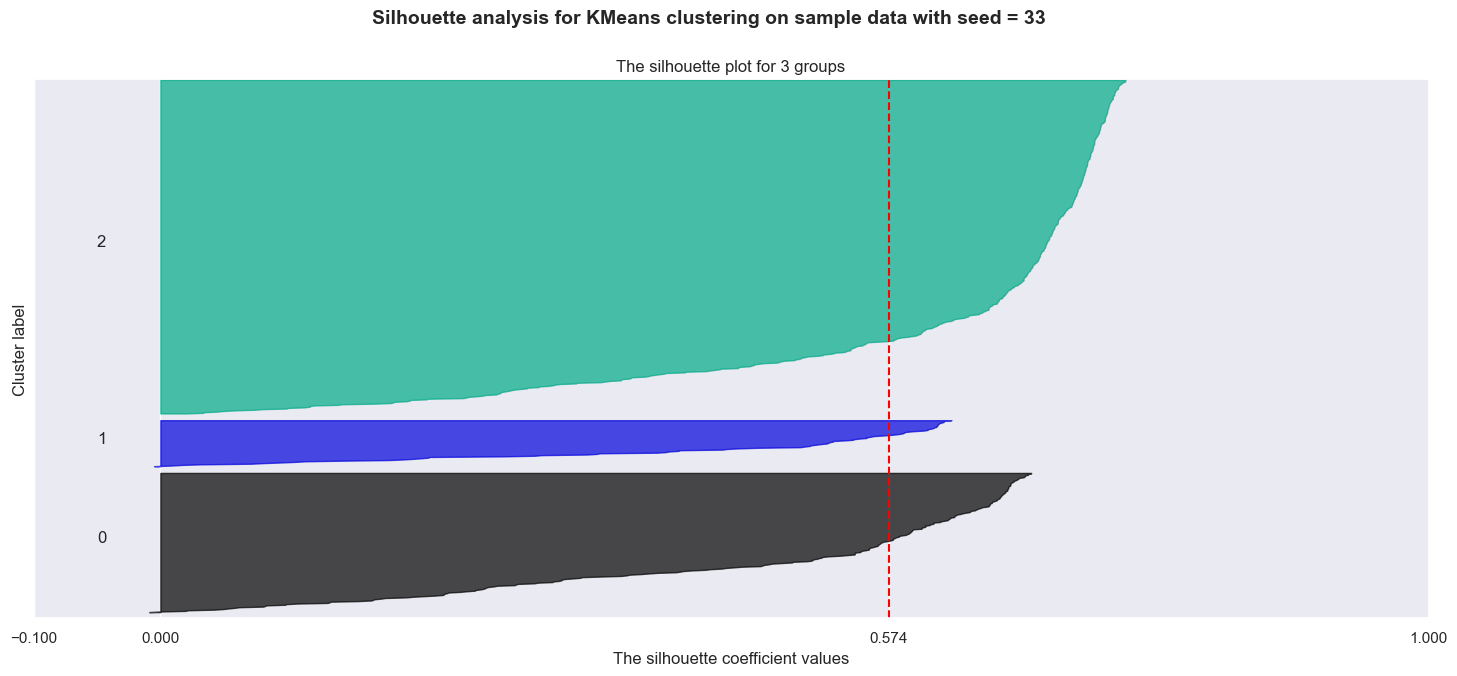

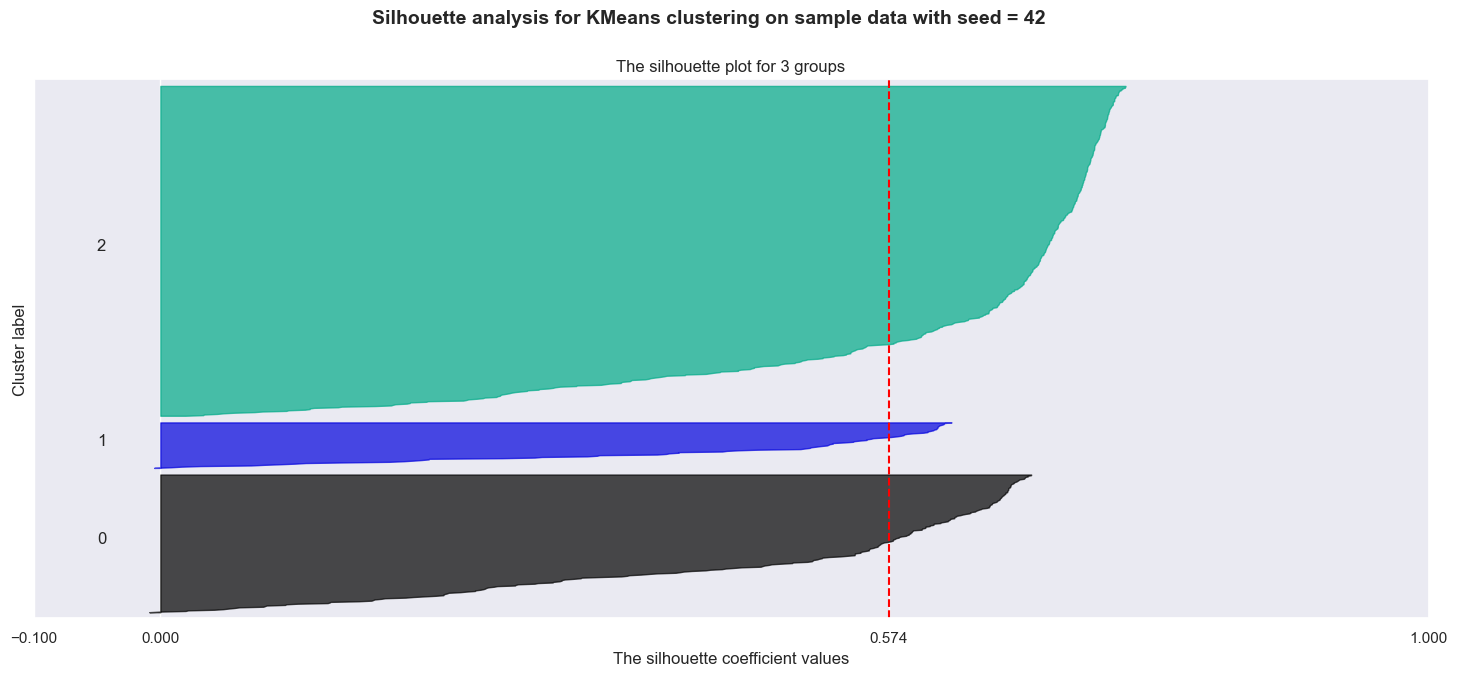

In [895]:
valores = [(9,3),
           (22,3),
           (33,3),
           (42,3),
           ]

for n, valor in enumerate(valores):
    semilla, k = valor
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 0.2])
    ax1.set_ylim([0, len(X) + (n + 1) * 10])

    clusterer = KMeans(n_clusters=k, random_state=semilla, init='random', n_init=1)
    cluster_labels = clusterer.fit_predict(X)


    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / 5)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for {k} groups")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, silhouette_avg, 1.0])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with seed = %d"
        % semilla,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Por medio del metodo de la sombra se puede ver que con k=3 los grupos tienen un valor por encima de 0.5 lo que indica que un punto esta bien agrupado y que es similar a otros puntos en su cluster. Como todos pasan la prueba se escoge aleatoriamente el seed 9. No se escoge el 22 debido a que el cluster 2 a duras penas pasa la prueba.  

In [896]:
k = 3
semilla = 9

final_model = KMeans(n_clusters=k, random_state=semilla, init='random', n_init=1)
final_model.fit(X)

KMeans(init='random', n_clusters=3, n_init=1, random_state=9)

In [897]:
clusters = final_model.cluster_centers_

info_clusters = pd.DataFrame(clusters, index=[f"Grupo {i+1}" for i in range(k)], columns=X.columns).transpose()
info_clusters

,Grupo 1,Grupo 2,Grupo 3
Grupo,6.710526e-01,0.552632,0.223853
Sexo,5.789474e-01,0.460526,0.521101
Edad,5.855263e+01,59.197368,49.697248
Lesion,1.052632e-01,0.135965,0.275229
Dolor,4.473684e-01,0.508772,0.605505
SBP,1.327237e+02,127.916667,138.576147
HR,8.872368e+01,84.285088,83.777982
RR,2.050000e+01,19.649123,18.985321
BT,3.662105e+01,36.519737,36.566789
KTAS_experto,2.973684e+00,3.039474,3.488073


El numero de clientes por cluster es:


{0: 76, 1: 228, 2: 545}

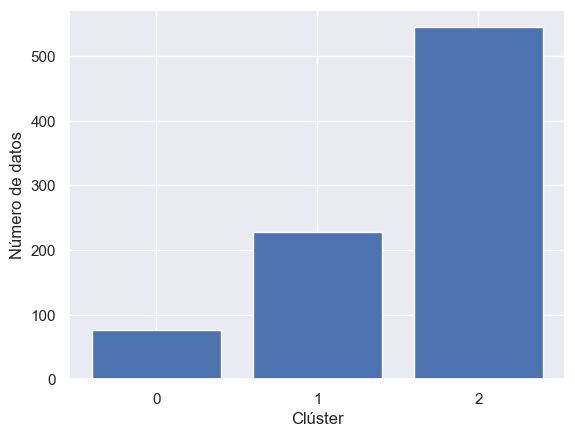

In [898]:
labels_knn = final_model.labels_
indexes, values = np.unique(labels_knn, return_counts=True)
rects = plt.bar(indexes, values)
plt.xlabel('Clúster')
plt.ylabel('Número de datos')
plt.xticks(indexes)
print('El numero de clientes por cluster es:')
{indexes[i]: values[i] for i in range(len(indexes))}

Ahora que se tienen los centroides se procede con la Interpretacion
### Interpretacion de Centroides

In [899]:
centroids_array = final_model.cluster_centers_
centroids = pd.DataFrame(centroids_array, columns=X.columns)
centroids

,Grupo,Sexo,Edad,Lesion,Dolor,SBP,HR,RR,BT,KTAS_experto,Duracion_Estancia_Min,Duracion_KTAS_Min,Disposicion_2,Disposicion_3,Disposicion_4,Disposicion_5,Disposicion_6,Disposicion_7,Modo_Llegada_2,Modo_Llegada_3,Modo_Llegada_4,Modo_Llegada_5,Estado_Mental_2,Estado_Mental_3,Estado_Mental_4,Cluster
0,0.671053,0.578947,58.552632,0.105263,0.447368,132.723684,88.723684,20.500000,36.621053,2.973684,1009.486842,4.793421,0.605263,0.013158,0.013158,0.039474,1.734723e-18,0.013158,0.302632,0.407895,0.250000,0.026316,0.039474,0.065789,0.013158,4.440892e-16
1,0.552632,0.460526,59.197368,0.135965,0.508772,127.916667,84.285088,19.649123,36.519737,3.039474,464.127193,5.100965,0.421053,0.017544,0.017544,0.021930,1.315789e-02,0.021930,0.280702,0.543860,0.118421,0.004386,0.052632,0.048246,0.017544,1.000000e+00
2,0.223853,0.521101,49.697248,0.275229,0.605505,138.576147,83.777982,18.985321,36.566789,3.488073,145.563303,6.470440,0.113761,0.001835,0.027523,0.014679,3.669725e-03,0.014679,0.196330,0.656881,0.053211,0.012844,0.025688,0.005505,0.005505,2.000000e+00


**Cluster 0 (76):** Este segmento se caracteriza por tener una edad promedio de 58.55, con dolor y signos vitales normales o un poco altos. Son el grupo que mas tiempo duran en el hospital ( 1009.48 minutos).<br>
**Cluster 1 (228):** Este segmento tiene una edad promedio de 59.19, con signos vitales normales. Su duracion en el hospital es de 464.12 minutos. <br>
**Cluster 2(545):** Este segmento tiene un promedio de 49. 70 años,con signos vitales normales exepto la presion arterial que se encuentra en 138.78 que es considerada alta y mayor tendencia a ser referidos a especialistas.  Este segmento tiene una estancia de 145.56 minutos en promedio. 

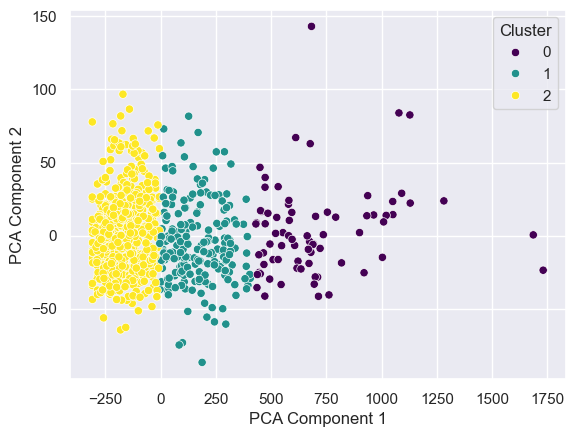

In [900]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


clusters = final_model.fit_predict(X)
X['Cluster'] = clusters

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Create a new DataFrame with the PCA components and the Cluster column
pca_df = pd.DataFrame(pca_result, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['Cluster'] = clusters

# Plot the PCA-reduced data
sns.scatterplot(data=pca_df, x='PCA Component 1', y='PCA Component 2', hue='Cluster', palette='viridis')

# Show the plot
plt.show()



In [901]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Agglomerative Clustering
sil_score_ac = silhouette_score(X_principal, labels_ac)
db_score_ac = davies_bouldin_score(X_principal, labels_ac)
ch_score_ac = calinski_harabasz_score(X_principal, labels_ac)

# KNN Clustering
sil_score_knn = silhouette_score(X, labels_knn)
db_score_knn = davies_bouldin_score(X, labels_knn)
ch_score_knn = calinski_harabasz_score(X, labels_knn)
"""
# DBSCAN Clustering
sil_score_dbscan = silhouette_score(X, labels_dbscan)
db_score_dbscan = davies_bouldin_score(X, labels_dbscan)
ch_score_dbscan = calinski_harabasz_score(X, labels_dbscan)"""

# Resultados
print(f"Agglomerative Clustering: Silhouette: {sil_score_ac}, Davies-Bouldin: {db_score_ac}, Calinski-Harabasz: {ch_score_ac}")
print(f"KNN Clustering: Silhouette: {sil_score_knn}, Davies-Bouldin: {db_score_knn}, Calinski-Harabasz: {ch_score_knn}")
#print(f"DBSCAN Clustering: Silhouette: {sil_score_dbscan}, Davies-Bouldin: {db_score_dbscan}, Calinski-Harabasz: {ch_score_dbscan}")


Agglomerative Clustering: Silhouette: 0.19414089044440347, Davies-Bouldin: 1.877199282223955, Calinski-Harabasz: 71.66944886400965
KNN Clustering: Silhouette: 0.5741520783912578, Davies-Bouldin: 0.5766853508150066, Calinski-Harabasz: 1884.2330831296094
